In [20]:
def solve_euler_explicit(f, x0, dt, tmax):
    T = [0]
    X = [x0]
    n = int(tmax/dt)
    for k in range(n):
        X.append(X[-1]+dt*f(X[-1]))
        T.append(T[-1]+dt)
    return(T, X)

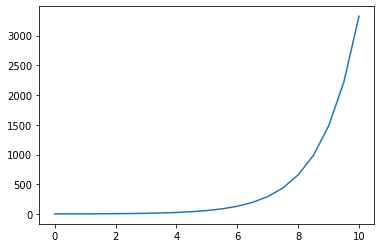

In [37]:
#on teste notre solveur avec la fonction exponentielle
import math

def f(x):
    return(x)

def g(x):
    return(2*math.sqrt(x))

T, X = solve_euler_explicit(f, 1, 0.5, 10) 
import numpy as np
import matplotlib.pyplot as plt

T1 = np.array(T)
X1 = np.array(X)
plt.plot(T1, X1)
plt.show()

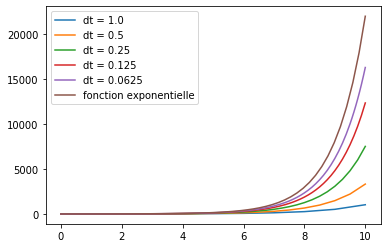

In [15]:
#illustration de la convergence du schéma à l'ordre 1
import math

for k in range(5):
    dt = 1/2**k
    t, x = solve_euler_explicit(f, 1, dt, 10)
    plt.plot(t, x, label = f"dt = {dt}")
    plt.legend()

T = np.linspace(0, 10)
X = [math.exp(t) for t in T]
plt.plot(T, X, label = "fonction exponentielle")
plt.legend()
plt.show()

In [16]:
#illustration de la convergence du schéma d'ordre 2
#on a vu dans l'exercice 1 que le schéma de Heun est consistant d'ordre 2, nous allons donc l'utiliser

def solve_heun(f, x0, dt, tmax):
    T = [0]
    X = [x0]
    n = int(tmax/dt)
    for k in range(n):
        T.append(T[-1]+dt)
        X.append(X[-1]+dt/2*(f(T[-2], X[-1])+f(T[-1], X[-1]+dt*f(T[-2], X[-1]))))
    return(T, X)   

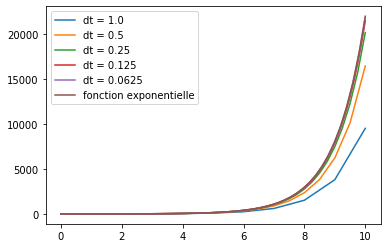

In [17]:
import math

for k in range(5):
    dt = 1/2**k
    t, x = solve_heun(f, 1, dt, 10)
    plt.plot(t, x, label = f"dt = {dt}")
    plt.legend()

T = np.linspace(0, 10)
X = [math.exp(t) for t in T]
plt.plot(T, X, label = "fonction exponentielle")
plt.legend()
plt.show()

In [46]:
import numpy as np

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs, dT = [t0], [x0], [0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        dT.append(dt2DT)
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs, dT)

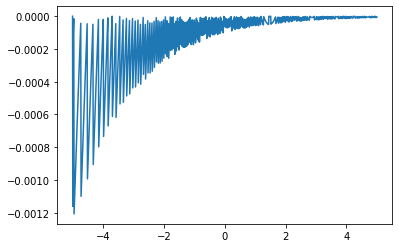

In [50]:
#affichage des pas dt2DT successifs 
T, X, dT = solve_ivp_euler_explicit_variable_step(f, -5, 1, 5, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6)
plt.plot(T, dT)
plt.show()